<a href="https://colab.research.google.com/github/PuruBhatnagar1197/Machine-Learning-Revision/blob/main/Softmax_based_logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [2]:
df=sns.load_dataset('iris')

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
encoding=LabelEncoder()
df['species']=encoding.fit_transform(df['species'])

In [9]:
x=df[['sepal_length','petal_length']]
y=df['species']

In [10]:
x_train, x_test, y_train,y_test=train_test_split(x,y,test_size=0.8, random_state=10)

In [11]:
lr=LogisticRegression(multi_class='multinomial') ### this is the method to call if you want to apply Softmax

In [12]:
lr.fit(x_train,y_train)

LogisticRegression(multi_class='multinomial')

In [14]:
y_pred=lr.predict(x_test)

In [15]:
accuracy_score(y_pred,y_test)

0.9583333333333334

In [16]:
confusion_matrix(y_test,y_pred)

array([[41,  0,  0],
       [ 0, 37,  4],
       [ 0,  1, 37]])

In [18]:
### predict_probab is used to give probability of the individual class for a given input
query = np.array([[3.4,2.7]])
lr.predict_proba(query)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[0.83157741, 0.16389542, 0.00452717]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


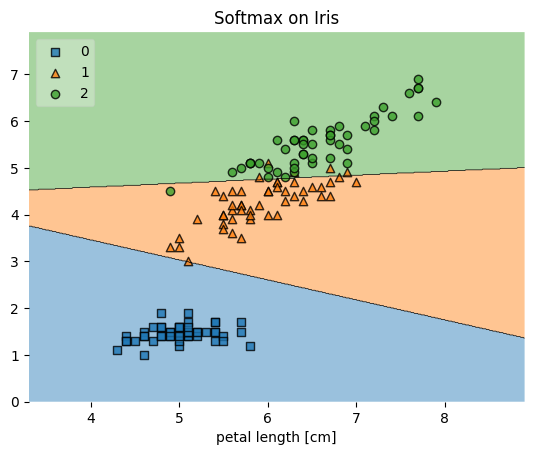

In [21]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(x.values, y.values, lr, legend=2)

# Adding axes annotations
plt.xlabel('sepal length [cm]')
plt.xlabel('petal length [cm]')
plt.title('Softmax on Iris')

plt.show()